# Customer Propensity Modelling

---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')



In [2]:
from sklearn.model_selection import train_test_split

Loading the data from the training sample

In [3]:
rawdata = pd.read_csv("../data/raw/training_sample.csv")


In [4]:
rawdata.columns


Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [5]:
rawdata.drop('UserID', axis='columns',inplace=True)


In [6]:
TARGET = 'ordered'

Make a Train/Test split and remember that we need to stratify respect to the `TARGET` because of the imbalance.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    rawdata.drop(TARGET, axis='columns'),
    rawdata[TARGET],
    test_size=0.2, 
    random_state=42,
    shuffle=True,
    stratify=rawdata[TARGET])


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42,verbose=True,class_weight='balanced')


In [11]:
RandomForest.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished


RandomForestClassifier(class_weight='balanced', random_state=42, verbose=True)

In [12]:
y_predict = RandomForest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [13]:
report = classification_report(y_test, y_predict, output_dict=True)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.85      0.98      0.91      3819

    accuracy                           0.99     91081
   macro avg       0.92      0.98      0.95     91081
weighted avg       0.99      0.99      0.99     91081



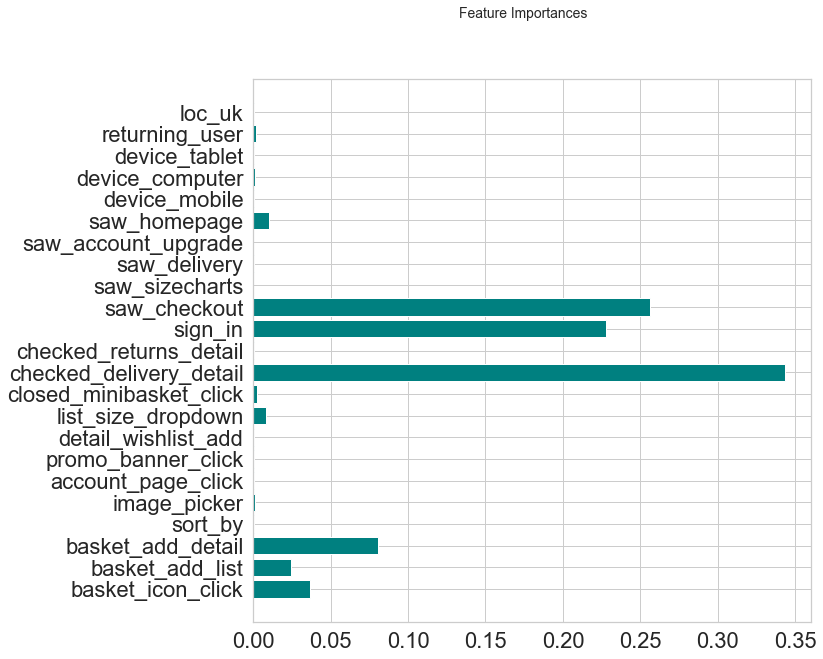

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        RandomForest.feature_importances_,
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)


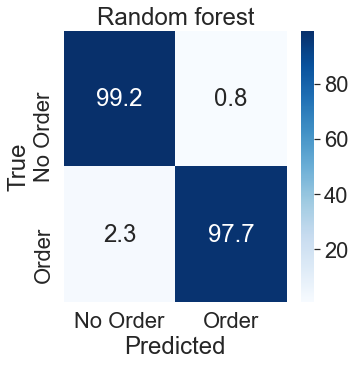

In [15]:
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="Random forest", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'));


In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
Logistic = LogisticRegression(random_state=42, verbose=True, class_weight='balanced')


In [18]:
Logistic.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(class_weight='balanced', random_state=42, verbose=True)

In [19]:
y_predict = Logistic.predict(X_test)


In [24]:
abs(Logistic.coef_[0])

array([ 0.81183371,  0.69769495,  0.71321026,  0.29876204,  0.15691763,
        0.49742865,  0.05758299,  0.76938571,  0.32020405,  0.20228129,
        6.05556148,  0.33768312,  1.84562448, 11.44293103,  0.58558212,
        1.57655024,  0.82503957,  0.19652843,  0.06356471,  0.61312938,
        0.33414407,  0.50665671,  0.70571228])

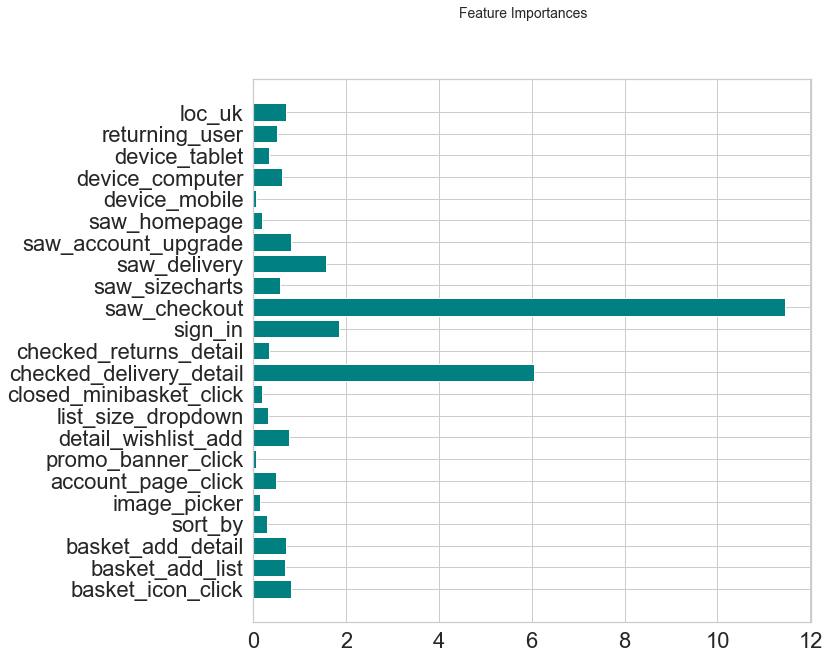

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        abs(Logistic.coef_[0]),
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.85      0.99      0.91      3819

    accuracy                           0.99     91081
   macro avg       0.92      0.99      0.95     91081
weighted avg       0.99      0.99      0.99     91081



[[Text(0, 0.5, 'No Order'), Text(0, 1.5, 'Order')],
 Text(11.5, 0.5, 'True'),
 [Text(0.5, 0, 'No Order'), Text(1.5, 0, 'Order')],
 Text(0.5, 11.5, 'Predicted'),
 Text(0.5, 1.0, 'Random forest')]

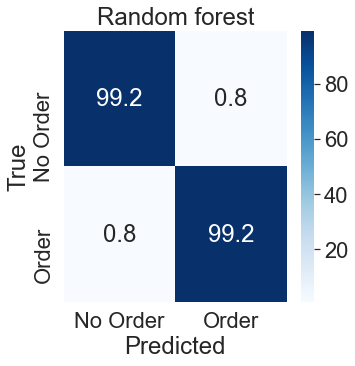

In [ ]:
print(classification_report(y_test, y_predict))
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="Logistic Regression", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'))

/home/pdona/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.87      0.97      0.92      3819

    accuracy                           0.99     91081
   macro avg       0.94      0.98      0.96     91081
weighted avg       0.99      0.99      0.99     91081



[[Text(0, 0.5, 'No Order'), Text(0, 1.5, 'Order')],
 Text(11.5, 0.5, 'True'),
 [Text(0.5, 0, 'No Order'), Text(1.5, 0, 'Order')],
 Text(0.5, 11.5, 'Predicted'),
 Text(0.5, 1.0, 'XGB Classifier')]

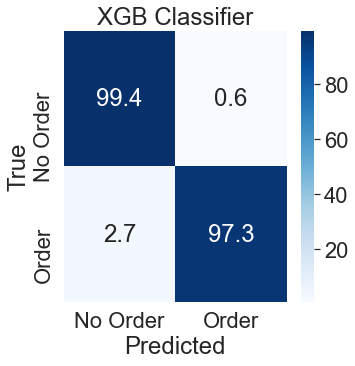

In [ ]:
from xgboost import XGBClassifier

xgbClass = XGBClassifier(n_estimators=500)
xgbClass.fit(X_train, y_train)
y_predict = xgbClass.predict(X_test)
print(classification_report(y_test, y_predict))
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="XGB Classifier", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'))


In [ ]:
xgbClass = XGBClassifier()
xgbClass.fit(X_train, y_train, early_stopping_rounds = 5, eval_metric = "logloss", eval_set = [(X_test,y_test)], verbose = True)


/home/pdona/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.44344
[1]	validation_0-logloss:0.30574
[2]	validation_0-logloss:0.21915
[3]	validation_0-logloss:0.16149
[4]	validation_0-logloss:0.12170
[5]	validation_0-logloss:0.09374
[6]	validation_0-logloss:0.07375
[7]	validation_0-logloss:0.05933
[8]	validation_0-logloss:0.04890
[9]	validation_0-logloss:0.04128
[10]	validation_0-logloss:0.03567
[11]	validation_0-logloss:0.03158
[12]	validation_0-logloss:0.02857
[13]	validation_0-logloss:0.02637
[14]	validation_0-logloss:0.02472
[15]	validation_0-logloss:0.02350
[16]	validation_0-logloss:0.02261
[17]	validation_0-logloss:0.02197
[18]	validation_0-logloss:0.02150
[19]	validation_0-logloss:0.02113
[20]	validation_0-logloss:0.02084
[21]	validation_0-logloss:0.02066
[22]	validation_0-logloss:0.02053
[23]	validation_0-logloss:0.02042
[24]	validation_0-logloss:0.02036
[25]	validation_0-logloss:0.02030
[26]	validation_0-logloss:0.02026
[27]	validation_0-logloss:0.02024
[28]	validation_0-logloss:0.02022
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

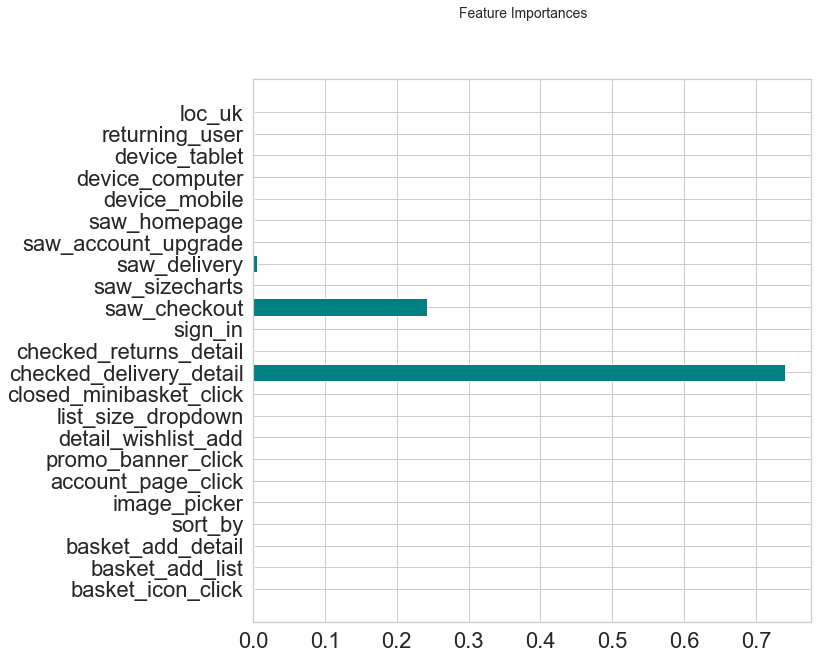

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        xgbClass.feature_importances_,
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)
